## By Juan Nuñez Corporan

This notebook is for checking words that apply to recent Data Science Job Postings, to see what are the most mentioned words, pairs of words, and other combinations of words in job postings and job titles. The objective of it is to maintain a notebook that can be executed in the future, to see if there's any changes from previous executions. It's also made in a way so that it can be easily extended in the future, like adding more sites and more features, to further improve the Analysis.

In [1]:
import urllib
import pandas as pd
import re
from bs4 import BeautifulSoup
import json

## 1. Obtaining the Data

To obtain data, two websites'  source code are downloaded and read, while looking for 3 particular text sections: Company Name (if it exists), Job Post Title, and Job Post Test. To this end, the **scrapy** library is used, for both crawling and scraping the pages, and for parsing the resulting HTML source. The results from this scraping is saved into a jsonlines file (.jl) and subsequently read and turned into a pandas dataframe. At the moment of writing, the two websites scraped are Indeed.com and Kaggle.com/jobs

In [2]:
from pathlib import Path
import os

#If the file already exists, delete it. This is to prevent scrapy from appending the same results at the end. 
path = os.path.realpath('.')
file = Path(path + "\\results.jl")

if file.is_file():
    os.remove(file)

In [3]:
%run ./Spiders

2017-06-10 21:10:28 [scrapy.utils.log] INFO: Scrapy 1.3.3 started (bot: scrapybot)
2017-06-10 21:10:28 [scrapy.utils.log] INFO: Overridden settings: {'FEED_URI': 'results.jl', 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2017-06-10 21:10:28 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2017-06-10 21:10:28 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.Htt

2017-06-10 21:10:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.indeed.com/jobs?q=Data+Science&start=40&pp=ACgAAAAAAAAAAAAAAAEQLa-kAQEBEQKR2YC5O7-Q5sy2CuhXQ-7XksaFoq-wkmKF43QBOMIXif8nVcwRh8lCLftg09mBOhU0ThozkLMWe2IvexaoaWtYx-9wV3OwnZ11heEdsA1RPK0J> (referer: None)
2017-06-10 21:10:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=10&pp=AAoAAAAAAAAAAAAAAAEQLa-kAQALx6B4za3s-O1PKyDBbc9fKJS3H3-H_Vk0ib6m>
{'JobTitle': 'Data Science – Analyst', 'Company': None, 'Text': ['\n', ' ', ' – Analyst. Bachelor’s Degree with a focus on ', ' ', ', statistics, mathematics, and/or computer ', '....']}
2017-06-10 21:10:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=10&pp=AAoAAAAAAAAAAAAAAAEQLa-kAQALx6B4za3s-O1PKyDBbc9fKJS3H3-H_Vk0ib6m>
{'JobTitle': 'Director of Data Science - Virtual', 'Company': '\n    Goodway Group', 'Text': ['\nMinimum of 4 years’ experience in machine learning, large sc

2017-06-10 21:10:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=40&pp=ACgAAAAAAAAAAAAAAAEQLa-kAQEBEQKR2YC5O7-Q5sy2CuhXQ-7XksaFoq-wkmKF43QBOMIXif8nVcwRh8lCLftg09mBOhU0ThozkLMWe2IvexaoaWtYx-9wV3OwnZ11heEdsA1RPK0J>
{'JobTitle': 'Data Scientist', 'Company': '\n    UC San Diego', 'Text': ['\nStatistics or social ', ' research techniques; Fluency in information technologies, including high level of proficiency and understanding with ', ' mapping,...']}
2017-06-10 21:10:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=20&pp=ABQAAAAAAAAAAAAAAAEQLa-kAQEBCGsieq62DdaE0bMkNjhOBYdvjinlJdafh-1WWniDJ5G_4WJDpdNqxV6KvrKTVfzCUkR2>
{'JobTitle': 'Data Scientist', 'Company': '\n    Wipro Limited', 'Text': ['\nSkills - Hands On With Statistical Modeling, ', ' Prep, Soft Skills, Visualization Experience, Domain, Process Experience, R, Python, SAS, SQL, ', ' Scientist –...']}
2017-06-10 21:10:37 [scrapy.core.

2017-06-10 21:10:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=30&pp=AB4AAAAAAAAAAAAAAAEQLa-kAQEBCAuTs6DmHKjJ5qIP9SzyEDiWM9bMalhr06VP9dBUXSypoLR5H06I8fLxUvImwMGAdPookcE_kbXbSsZf9po9LYf6y5Ry_g>
{'JobTitle': 'Data Science Advisor', 'Company': '\n    U.S. Bank', 'Text': ['\n', ' ', ' Advisor. US Bank is looking for an accomplished and passionate technology leader to support the ', ' ', ' team within Technology Strategy...']}
2017-06-10 21:10:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.indeed.com/jobs?q=Data+Science&start=30&pp=AB4AAAAAAAAAAAAAAAEQLa-kAQEBCAuTs6DmHKjJ5qIP9SzyEDiWM9bMalhr06VP9dBUXSypoLR5H06I8fLxUvImwMGAdPookcE_kbXbSsZf9po9LYf6y5Ry_g>
{'JobTitle': 'Data Scientist, Junior', 'Company': '\n    Booz Allen Hamilton', 'Text': ['\n', ' Scientist, Junior. BA or BS degree in Analytics, ', ' ', ', Statistics, Mathematics, or Engineering....']}
2017-06-10 21:10:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https

2017-06-10 21:11:02 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17853/facebook-research-scientist-core-data-science-tel-aviv-london>
{'JobTitle': 'Research Scientist, Core Data Science', 'Company': 'Facebook', 'Text': ['Posted ', ' (575 views)', "Facebook's mission is to give people the power to share, and make the world more open and connected. Through our growing family of apps and services, we're building a different kind of company that helps billions of people around the world connect and share what matters most to them. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to make the world more open and accessible. Connecting the world takes every one of us—and we're just getting started.", 'Facebook’s Core Data Science (', ')organization works across all products in the company, helping them magnif

2017-06-10 21:11:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.kaggle.com/jobs/17824/so1-gmbh-machine-learning-research-engineer-berlin> (referer: None)
2017-06-10 21:11:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17824/so1-gmbh-machine-learning-research-engineer-berlin>
{'JobTitle': 'Machine Learning Research Engineer', 'Company': 'So1 GmbH', 'Text': ['Posted ', ' (1,120 views)', 'Are you passionate about applied machine learning research? Are you open-minded about approaches and techniques, willing to pick the best tool for the job? Would you like to work with a unique live dataset spanning billions of rows?', 'Would you like to see how your insights and models influence the purchasing habits of millions of people?', 'Are you keen on working with world class teammates in a successful startup to bring a product to the market that will change a billion-Dollar industry? Well, this position might be just for you!']}
2017-06-10 21:11:49 [s

2017-06-10 21:12:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.kaggle.com/jobs/17844/handelsblatt-gmbh-senior-database-developer-w-m-d-sseldorf-germany> (referer: None)
2017-06-10 21:12:19 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17844/handelsblatt-gmbh-senior-database-developer-w-m-d-sseldorf-germany>
{'JobTitle': '(Senior) Database Developer (w/m)', 'Company': 'Handelsblatt GmbH', 'Text': ['Posted ', ' (949 views)', 'Die ', ' ist Marktführer im Segment der Wirtschafts- und Finanzpresse. Objekte wie Handelsblatt und WirtschaftsWoche stehen beispielhaft für das hohe Niveau unserer Printtitel. Die Verlagsgruppe Handelsblatt gehört mit zahlreichen Online- und Offline-Produkten zu den Vorreitern auf dem Gebiet der elektronischen Medien. Von der aktuellen Nachricht bis zum fundierten Hintergrundwissen erhalten unsere Leser täglich Informationen mittels unterschiedlicher Medien - von der Zeitung, über Apss bis zum Internet.', 'Für den Bereic

2017-06-10 21:12:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.kaggle.com/jobs/17837/aia-group-natural-language-processing-nlp-engineer-hong-kong> (referer: None)
2017-06-10 21:12:54 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17837/aia-group-natural-language-processing-nlp-engineer-hong-kong>
{'JobTitle': 'Natural Language Processing (NLP) Engineer', 'Company': 'AIA Group', 'Text': ['Posted ', ' (1,391 views)', 'Job Summary:', 'Key Responsibilities:', 'Requirements:']}
2017-06-10 21:13:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.kaggle.com/jobs/17836/aia-group-data-scientist-hong-kong> (referer: None)
2017-06-10 21:13:00 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17836/aia-group-data-scientist-hong-kong>
{'JobTitle': 'Data Scientist', 'Company': 'AIA Group', 'Text': ['Posted ', ' (1,102 views)', 'To apply for this opportunity, please send your resume and a cover letter and salary expectati

2017-06-10 21:13:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.kaggle.com/jobs/17826/robert-bosch-data-scientist-palo-alto-ca> (referer: None)
2017-06-10 21:13:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.kaggle.com/jobs/17826/robert-bosch-data-scientist-palo-alto-ca>
{'JobTitle': 'Data Scientist', 'Company': 'Robert Bosch', 'Text': ['Posted ', ' (1,916 views)', 'Company Description', 'The Bosch Center for Artificial Intelligence provides services in AI technologies to Bosch’s business units and plants. The center works in collaboration with a large team of researchers, engineers, and software service providers. Our data mining methods and solutions are implemented in a modern distributed architecture in order to scale up to very large data sets.', 'Artificial intelligence technologies are impacting Bosch’s products and services in many domains: manufacturing, predictive maintenance, vehicle diagnostics, supply chain, large-scale simulations, etc. This 

2017-06-10 21:14:23 [scrapy.core.engine] INFO: Spider closed (finished)


In [4]:
data = []
with open('results.jl') as f:
    for line in f:
        data.append(json.loads(line))
        

posting_df = pd.DataFrame(data)
posting_df.head()

,Company,JobTitle,Text
0,\n Intel,Data Scientist/Deep Learning Engineer CG,"[\nMaster’s or PhD in computer , , electrical ..."
1,\n Intel,Deep Learning R&D Engineer_Intern,"[\nDeep learning, machine learning & big , . C..."
2,\n General Electric,Data Scientist,"[\nWork with , engineers on , quality assess..."
3,None,Data Scientist,"[\nBS degree (MS preferred) in Computer , , , ..."
4,None,Data Science – Analyst,"[\n, , – Analyst. Bachelor’s Degree with a f..."


In [5]:
posting_df.shape

(90, 3)

The results of the extraction are 90 job posting results, 50 from Indeed, and 40 from Kaggle.

## 2. Text Cleaning

The text extracted is riddled with imperfections, like new line characters, non-letter characters, and other special symbols. To have meaningful text for analysis, the text must first be cleaned. The first step is turning the texts from lists into one continous string. Then, some of the special characters are removed.

In [6]:

def Join_Text(fulltext):
    return " ".join(fulltext)

def Remove_NewLines(text):
    if not text:
        return text
    return text.replace("\n","").replace("\r","")

def Initial_Cleaning(dataframe):
    Kaggle_Text = dataframe.Text[50:]
    #Skip the two useless  texts in the kaggle job posts.
    new_kg_Text = [text[2:] for text in Kaggle_Text]
    dataframe.Text[50:] = new_kg_Text
    Joined_Text = dataframe.Text.apply(Join_Text)
    Removed_Newline_Text = Joined_Text.apply(Remove_NewLines)
    dataframe.Text = Removed_Newline_Text
    dataframe.Company = dataframe.Company.apply(Remove_NewLines)
    return dataframe

In [7]:
cleaned_df = Initial_Cleaning(posting_df)
cleaned_df.head()

,Company,JobTitle,Text
0,Intel,Data Scientist/Deep Learning Engineer CG,"Master’s or PhD in computer , electrical engi..."
1,Intel,Deep Learning R&D Engineer_Intern,"Deep learning, machine learning & big . Candi..."
2,General Electric,Data Scientist,"Work with engineers on quality assessment,..."
3,None,Data Scientist,"BS degree (MS preferred) in Computer , , M..."
4,None,Data Science – Analyst,– Analyst. Bachelor’s Degree with a focus ...


The next step is a more in-depth cleaning of the text. In this one, non-letter characters like numbers and punctuation marks are removed from the text. After this, the text is turned into all lowercase words. And finally, stopwords, words that have no analytical value like a,the,of, and so on, are removed from the text. This final resulting dataframe will be the one used for further analysis.

In [8]:
from nltk.corpus import stopwords
def Text_Cleaning(text):
    """
    Replace cleaned text with only meaningful words
    """
    
    #Remove non-letters        
    text = re.sub("[^a-zA-Z]", " ", text) 
    
    #Convert to lower case and split into individual words.
    words = text.lower().split()
    

    
    #Create set of english stopwords, since set is faster than list in python.
    stop_words = set(stopwords.words("english"))
    
    #Remove stopwords from review.
    removed_stops = [w for w in words if not w  in stop_words and len(w)!=1]
    #Join words back into a string.
    return(" ".join(removed_stops))

cleaned_df.Company = cleaned_df.Company.fillna("No Company")
Clean_Companies = cleaned_df.Company.apply(Text_Cleaning)
Clean_Jobs = cleaned_df.JobTitle.apply(Text_Cleaning)
Clean_Text = cleaned_df.Text.apply(Text_Cleaning)

In [9]:
Full_DF = cleaned_df.copy()
Full_DF.Company = Clean_Companies
Full_DF.JobTitle = Clean_Jobs
Full_DF.Text = Clean_Text
Full_DF.head()

,Company,JobTitle,Text
0,intel,data scientist deep learning engineer cg,master phd computer electrical engineering rel...
1,intel,deep learning engineer intern,deep learning machine learning big candidate m...
2,general electric,data scientist,work engineers quality assessment cleansing an...
3,company,data scientist,bs degree ms preferred computer machine learni...
4,company,data science analyst,analyst bachelor degree focus statistics mathe...


## 3. Data Manipulation

After cleaning the text, some extra features are created based on the text to facilitate the analysis. The first one is creating word combinations on the texts of the dataframe. This is to see which are the most mentioned words, or the most mentioned pairs of words.

In [10]:
import itertools
def Create_ngrams(all_text,number=1):
    #Get the word combination count for the text.
    result = {}
    for text in all_text:
        #Check if a pair is already in the dictionary. If it is add 1 to the counter, else add it to the dict.
        for comb in list(itertools.combinations(text.split(), number)): #Get all different combinations.
            found = False
            temp_dict = {}
            i =0
            while not found and i < len(comb):
                if comb[i] not in temp_dict:
                    temp_dict[comb[i]] = "Found"
                else:
                    found = True
                i += 1
            if not found:#Determine if a word is already repeated in the sequence
                if comb not in result:
                    result[comb]= 1
                else:
                    result[comb]+=1
    #Convert dictionary to a dataframe, for better plotting.
    df = pd.DataFrame({ str(number) + "-Combinations": list(result.keys()),"Count":list(result.values())})
    #Sort by count.
    return df.sort_values(by="Count",ascending=False)


In [11]:
Job1Grams = Create_ngrams(Full_DF.JobTitle)
Job2Grams = Create_ngrams(Full_DF.JobTitle,2)
Job3Grams = Create_ngrams(Full_DF.JobTitle,3)

Post1Grams = Create_ngrams(Full_DF.Text)
Post2Grams = Create_ngrams(Full_DF.Text,2)
Post3Grams = Create_ngrams(Full_DF.Text,3)

In [12]:
Job2Grams.head(10)

,2-Combinations,Count
0,"(data, scientist)",46
12,"(learning, engineer)",11
18,"(data, science)",9
54,"(machine, learning)",9
9,"(deep, learning)",9
3,"(data, engineer)",8
19,"(data, analyst)",8
10,"(deep, engineer)",8
17,"(engineer, intern)",6
16,"(learning, intern)",6


The next step is to calculate the Term Frequency - Inverse Document Frequency of the job posting's text. This is a weight that gives more importance to words that appear frequently in some documents, but do not appear a lot in the whole corpus of text. This gives a more clear understanding of which words are more important in the whole corpus of text. 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
def Calculate_tfidf(dataframe):
    corpus = list(dataframe.Text)
    vectorizer = TfidfVectorizer( min_df = 0.025, max_df = 0.25)
    #Calculate the sum of the weights for each label.
    vector_weights = vectorizer.fit_transform(corpus)
    #Get the real weight, by calculating the mean of the weights.
    weights= list(np.asarray(vector_weights.mean(axis=0)).ravel())
    #Convert it to a dataframe.
    df = pd.DataFrame({"Word":vectorizer.get_feature_names(),"Score":weights})
    #Sort them by score, and return it.
    df = df.sort_values(by = "Score" ,ascending = False)
    return df,vector_weights.toarray()

Text_TfIdf,Text_Vector = Calculate_tfidf(Full_DF)
Text_TfIdf.head(10)

,Score,Word
50,0.052476,computer
11,0.046952,analytics
228,0.044563,scientist
84,0.041042,engineering
248,0.040910,statistics
151,0.037362,learning
298,0.036057,working
62,0.032296,degree
8,0.030760,analysis
155,0.029219,looking


## 4. Data Visualization

For the visualization of the results, several barplots are created for the different combinations of words, and for the TF-IDF results. The first step is to modify the matplotlib parameters for bigger, higher quality plots.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
def Set_Parameters():
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (10, 6) # Size of plot
    rcParams['figure.dpi'] = 150 #Dots per inch of plot
    rcParams['lines.linewidth'] = 2 # Width of lines of the plot
    rcParams['axes.facecolor'] = 'white' #Color of the axes
    rcParams['font.size'] = 14 # Size of the text.
    rcParams['patch.edgecolor'] = 'white' #Patch edge color.
    rcParams['font.family'] = 'StixGeneral' #Font of the plot text.

Set_Parameters()

And now, the results.

#### Most common companies in job posts.

In [15]:
Full_DF.Company.value_counts()[0:10]

intel                  9
company                7
unitymedia gmbh        4
jp morgan chase        3
groupm                 2
tesla motors           2
izea                   2
booz allen hamilton    2
cox communications     2
leidos                 2
Name: Company, dtype: int64

At the time of writing, the most common companies that posts jobs (ignoring the meaningless no company) are Intel, Booz Allen Hamilton and Apple. Two of these are both tech companies and product companies, which makes sense since there's a high demand for technologically versed data scientists. Other mentions are Adobe and Tesla Motors, other tech/product companies, although Tesla is more of a motor company than anything else. 

#### Most common word combinations.

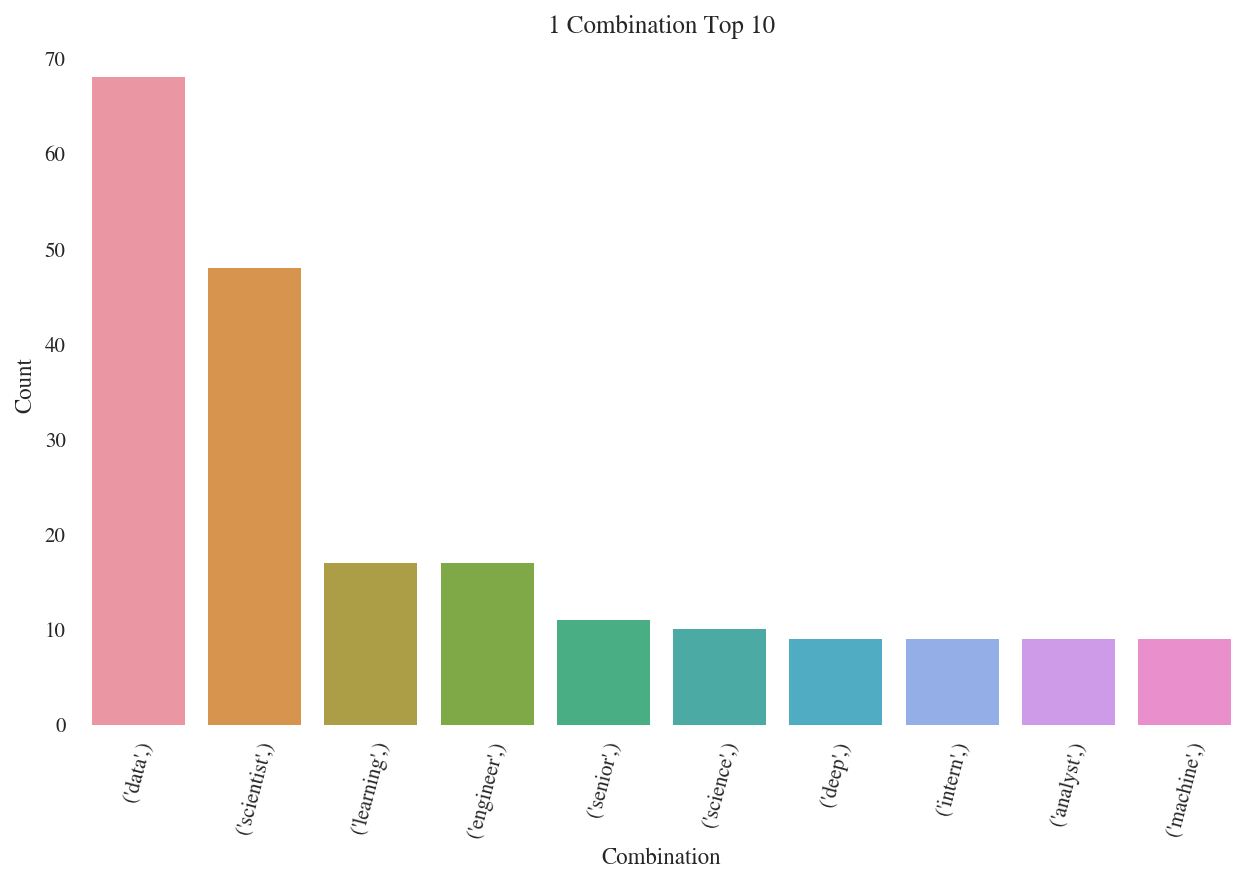

In [16]:
def Plot_nCombination(comb_df,n,title):
    sns.barplot(x=str(n) + "-Combinations",y = "Count",data = comb_df.head(10))
    plt.title(title)
    plt.xlabel("Combination")
    plt.ylabel("Count")
    plt.xticks(rotation = "75")
    plt.show()
    
Plot_nCombination(Job1Grams,1,"1 Combination Top 10")

Not surprisingly, **Data** is the most common word in between all job titles, next to **Scientist**. Other words include learning, engineer, science and machine, probably related to machine learning engineer, data science, deep learning, etc. 

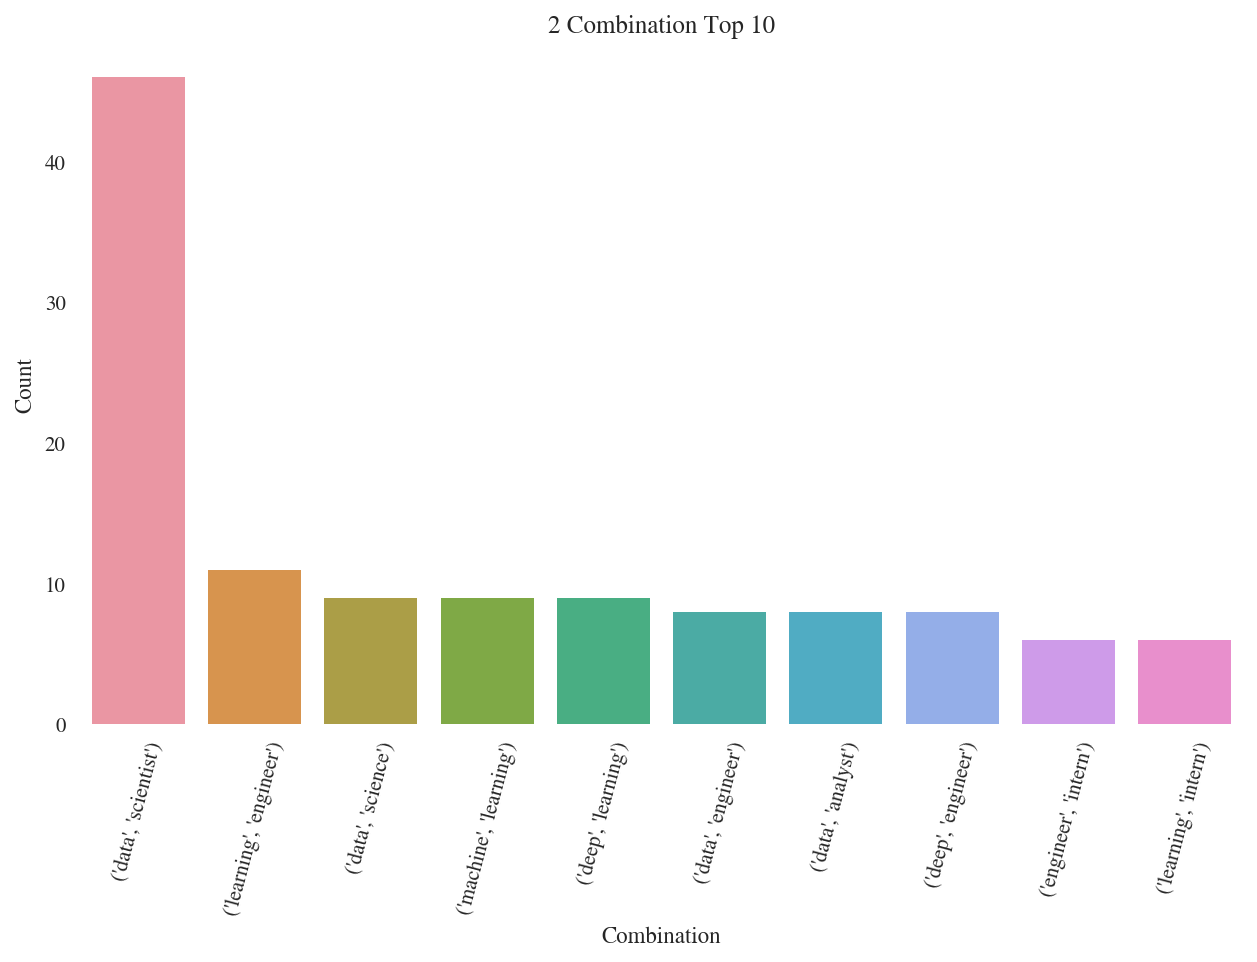

In [17]:
Plot_nCombination(Job2Grams,2,"2 Combination Top 10")

Word pairs give more sense to the most common terms in job postings. **Data Scientist** is the most common Job Title in job postings, and it's normal since a Data Scientist is a person specialized in the field of Data Science, which is the field of interest for this project. Other related job titles are data analyst and data engineer, which are the people that specialize in Data Analysis and Data Engineering, two professions related to Data Science

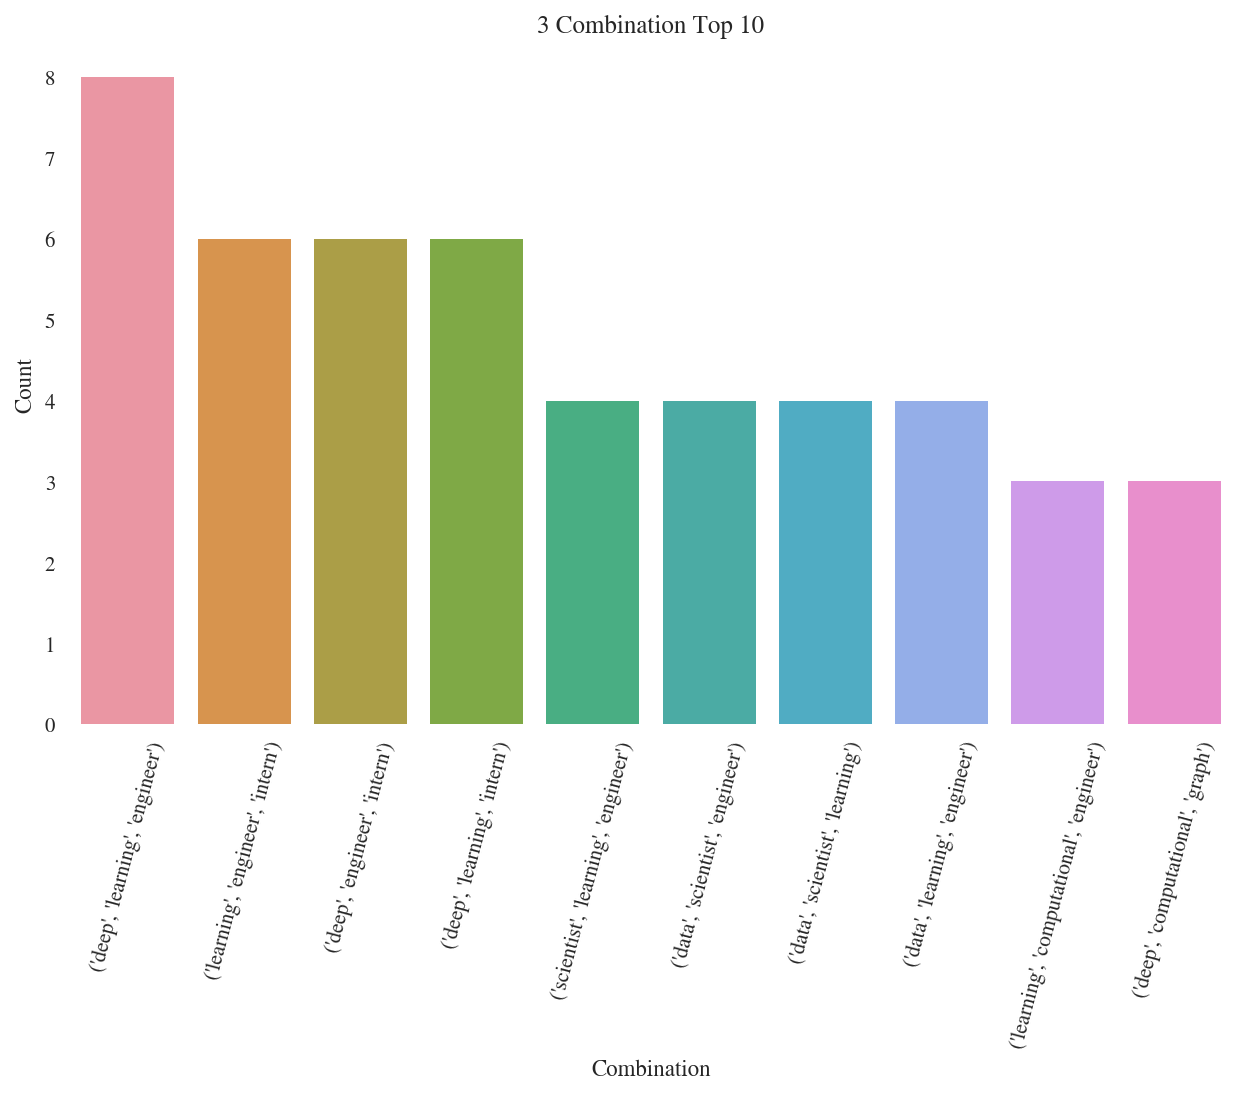

In [18]:
Plot_nCombination(Job3Grams,3,"3 Combination Top 10")

In 3 word combinations, there's less distinction between the number of times they appear, but some job titles end up making more sense, like deep learning engineer, machine learning engineer and others. 

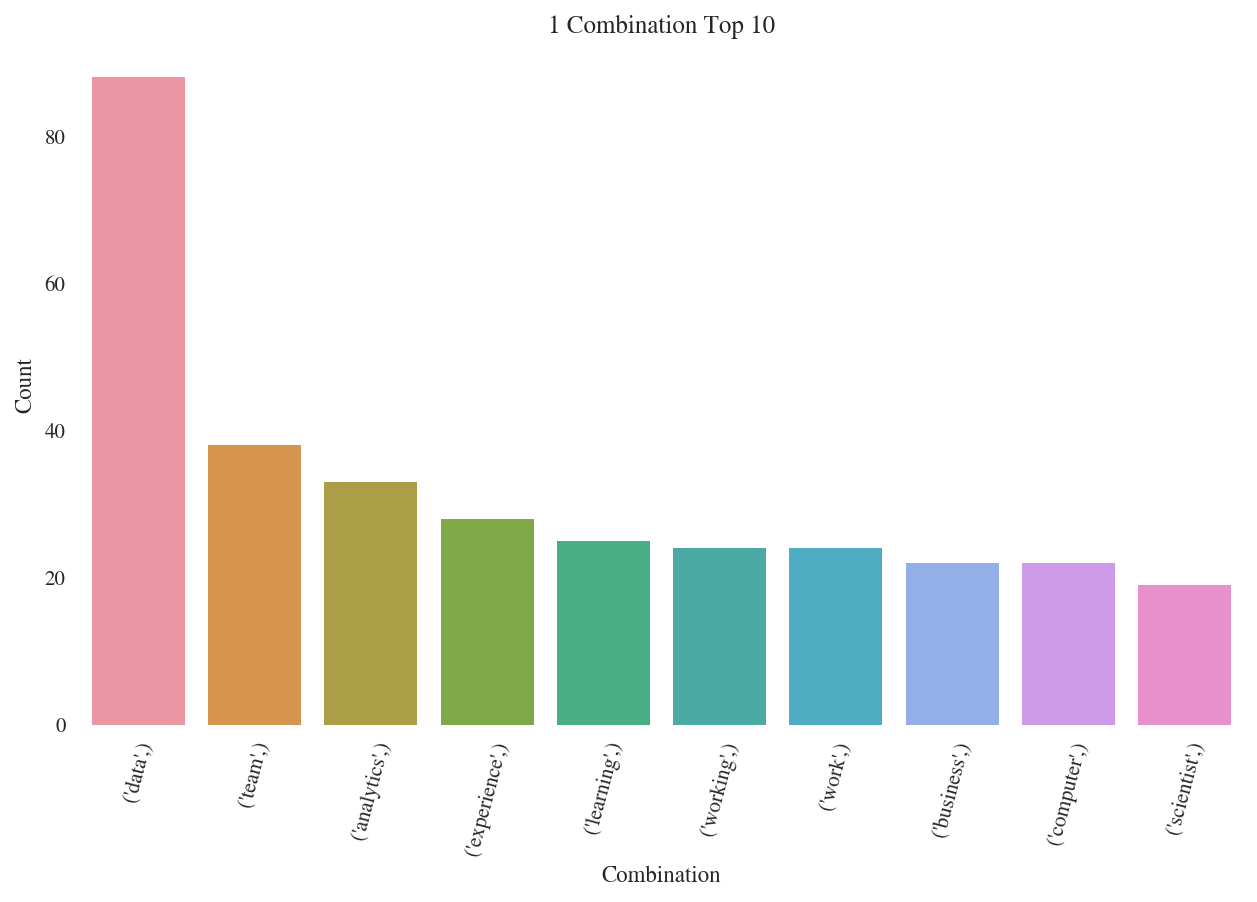

In [19]:
Plot_nCombination(Post1Grams,1,"1 Combination Top 10")

On the actual job posts' text, data is again the most common word, no surprise there. Team is the second most word, which also makes sense since a lot of job postings contain phrases like "You'll join our team of...", "You'll work with a team of..." and the like. Unfortunately for juniors, a lot of job posts include some kind of working experience, so you'll have to look elsewhere.

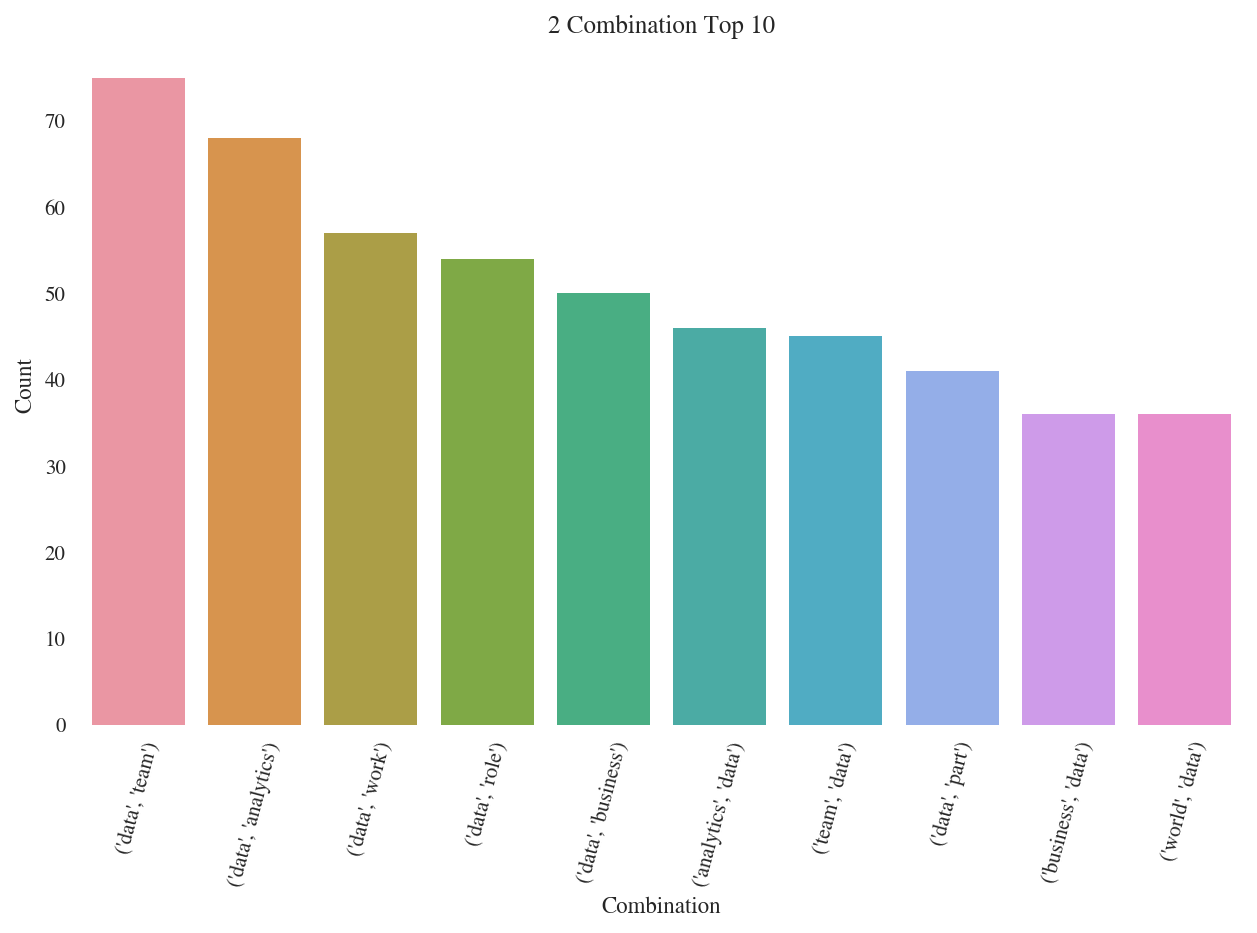

In [20]:
Plot_nCombination(Post2Grams,2,"2 Combination Top 10")

On job posts, most combinations include data and another common word in most posts like analytics, business, (real) world, etc. One interesting thing to note, is that most positions have an actual data team, which means that the company is mature enough to recognize the need for a separate team to handle data related work in the business. 

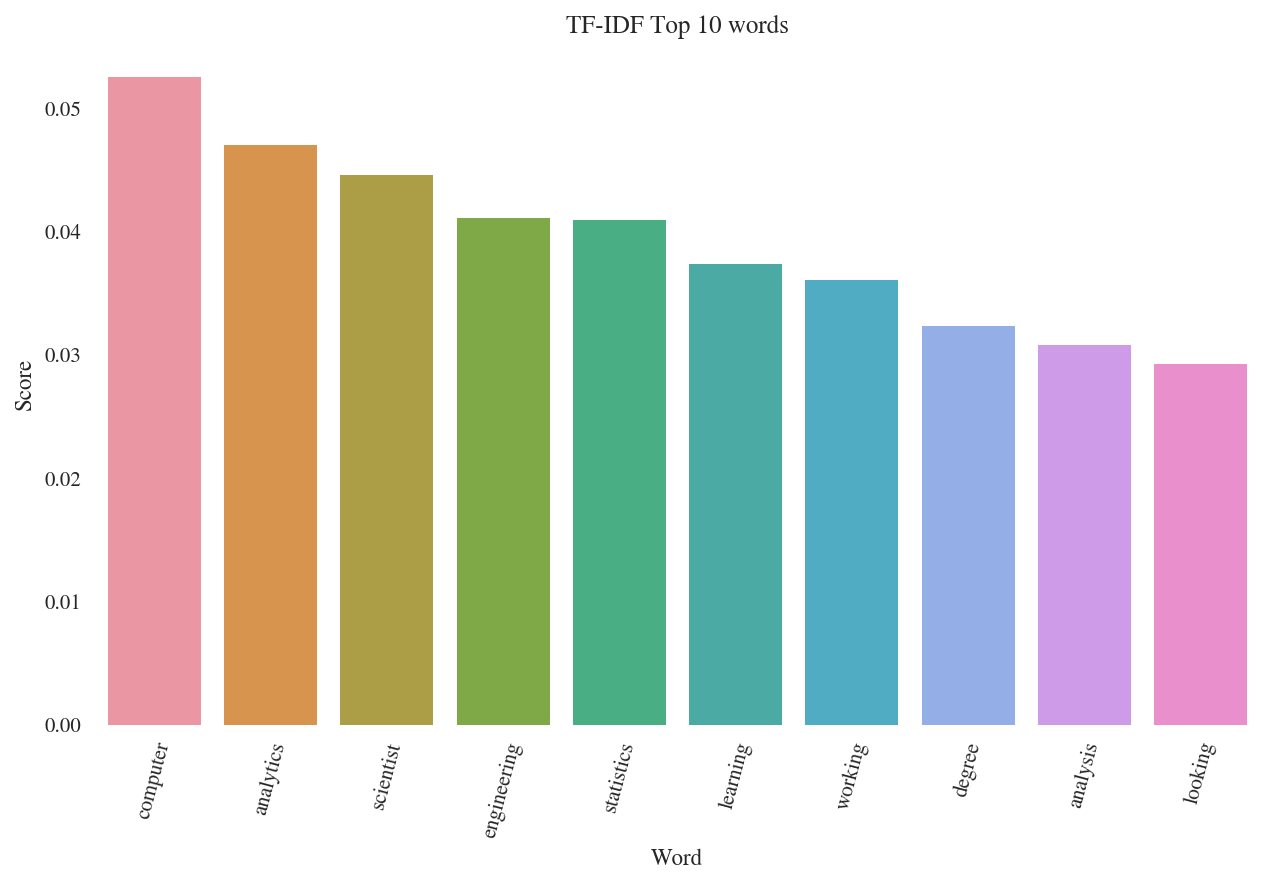

In [21]:
def Plot_Score(data,title):
    sns.barplot(x="Word",y = "Score",data = data.head(10))
    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Score")
    plt.xticks(rotation = "75")
    plt.show()

Plot_Score(Text_TfIdf,"TF-IDF Top 10 words")

On term frequency scores, we see some diferent results from regular word counts. Since data is such a common word in all job postings, it's not in the high tf-idf scores. This is the first time computer appears though, and with the highest score. This is usually because these job postings are looking for someone with a Computer Science degree, (two of these words have high tf-idf scores) and also solidifies the aspect that Data Science is having such a boom because of advances in the Computer Science related part of the field.

## 5. Conclusion

Overall, most companies are looking for either Data Scientists, or Machine Learning Engineers, two very "hot" professions right now. Still, they are related to each other, and go hand in hand in improving business efforts. Of the people they are looking for, companies are looking for employees with degrees, preferably im computer science or statistics, and previous work experience.  Some further improvements that could be made to this analysis are adding more websites to extract data from, and looking for other particular data like dates and  Skill sections. 